## Exploring 2016 US Presidential Election Results and associated demographic data

In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from matplotlib.backends.backend_pdf import PdfPages

In [4]:
pd.options.display.max_columns = 100

### Importing Data

In [5]:
file_results = "US_County_Level_Presidential_Results_08-16.csv"
file_demo = "data.csv"
file_acs = "ACS_15_1YR_S0201/ACS_15_1YR_S0201_with_ann.csv"

In [6]:
df_results = pd.read_csv(file_results)
df_demo = pd.read_csv(file_demo)
df_acs = pd.read_csv(file_acs)

/Users/scott/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (80,89,90,109,110,111,112,115,116,117,118,209,210,211,212,213,214,217,218,219,220,223,224,251,252,253,254,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,309,310,315,316,323,324,337,338,441,442,445,446,447,448,451,452,453,454,463,464,465,466,469,470,495,496,497,498,499,500,501,502,503,504,507,508,509,510,517,518,519,520,521,522,531,532,545,546,547,548,549,550,551,552,555,556,557,558,559,560,561,562,563,564,565,566,567,568,577,578,579,580,581,582,583,584,587,588,589,590,593,594,595,596,601,602,603,604) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 7 columns):
fips_code    9336 non-null int64
county       9336 non-null object
Year         9336 non-null int64
total        9336 non-null int64
dem          9336 non-null int64
gop          9336 non-null int64
oth          9336 non-null int64
dtypes: int64(6), object(1)
memory usage: 510.6+ KB


In [8]:
df_results.head(5)

,fips_code,county,Year,total,dem,gop,oth
0,1001,Autauga County,2008,23641,6093,17403,145
1,1001,Autauga County,2012,23909,6354,17366,189
2,1001,Autauga County,2016,24661,5908,18110,643
3,1003,Baldwin County,2008,81413,19386,61271,756
4,1003,Baldwin County,2012,84988,18329,65772,887


In [9]:
df_acs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Columns: 621 entries, Id to Margin of Error; COMPUTERS AND INTERNET USE - Total households - With a broadband Internet subscription
dtypes: float64(295), int64(115), object(211)
memory usage: 9.8+ MB


In [10]:
df_acs.iloc[:5,:10]

,Id,Id2,Geography,Id.1,Population Group,Estimate; TOTAL NUMBER OF RACES REPORTED - Total population,Margin of Error; TOTAL NUMBER OF RACES REPORTED - Total population,Estimate; TOTAL NUMBER OF RACES REPORTED - Total population - One race,Margin of Error; TOTAL NUMBER OF RACES REPORTED - Total population - One race,Estimate; TOTAL NUMBER OF RACES REPORTED - Total population - Two races
0,0500000US01073,1073,"Jefferson County, Alabama",1,Total population,660367,*****,98.8,0.3,1.1
1,0500000US01073,1073,"Jefferson County, Alabama",2,White alone,345005,2469,100,0.1,(X)
2,0500000US01073,1073,"Jefferson County, Alabama",3,White alone or in combination with one or more...,352319,2797,97.9,0.5,1.8
3,0500000US01073,1073,"Jefferson County, Alabama",4,Black or African American alone,282511,2538,100,0.1,(X)
4,0500000US01073,1073,"Jefferson County, Alabama",5,Black or African American alone or in combinat...,286250,2006,98.7,0.5,1


#### only looking at 2016 results

In [11]:
df_results_2016 = df_results[df_results['Year']==2016]

In [12]:
df_results_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112 entries, 2 to 9335
Data columns (total 7 columns):
fips_code    3112 non-null int64
county       3112 non-null object
Year         3112 non-null int64
total        3112 non-null int64
dem          3112 non-null int64
gop          3112 non-null int64
oth          3112 non-null int64
dtypes: int64(6), object(1)
memory usage: 194.5+ KB


In [13]:
df_results_2016.head()

,fips_code,county,Year,total,dem,gop,oth
2,1001,Autauga County,2016,24661,5908,18110,643
5,1003,Baldwin County,2016,94090,18409,72780,2901
8,1005,Barbour County,2016,10390,4848,5431,111
11,1007,Bibb County,2016,8748,1874,6733,141
14,1009,Blount County,2016,25384,2150,22808,426


In [14]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 38 columns):
State                                3111 non-null object
FIPS                                 3111 non-null int64
County                               3111 non-null object
election_result                      3111 non-null object
% Some College                       3111 non-null float64
% Smokers                            3111 non-null int64
% Single-Parent Households           3111 non-null int64
% Severe Housing Problems            3111 non-null int64
% Receiving HbA1c                    3078 non-null float64
% Physically Inactive                3111 non-null int64
% Obese                              3111 non-null int64
% Long Commute - Drives Alone        3111 non-null int64
% LBW                                3022 non-null float64
% Fair/Poor                          3111 non-null int64
% Excessive Drinking                 3111 non-null int64
% Drive Alone - White        

In [15]:
df_demo.head(5)

,State,FIPS,County,election_result,% Some College,% Smokers,% Single-Parent Households,% Severe Housing Problems,% Receiving HbA1c,% Physically Inactive,% Obese,% Long Commute - Drives Alone,% LBW,% Fair/Poor,% Excessive Drinking,% Drive Alone - White,% Drive Alone - Hispanic,% Drive Alone - Black,% Drive Alone,% Children in Poverty - White,% Children in Poverty - Hispanic,% Children in Poverty - Black,% Children in Poverty,% Alcohol-Impaired,% Mammography,Graduation Rate,Income Ratio,Mentally Unhealthy Days,Physically Unhealthy Days,Preventable Hosp. Rate,Teen Birth Rate,Violent Crime Rate,Years of Potential Life Lost Rate,Chlamydia Rate,Association Rate,% unemployment,% Uninsured,% With Access
0,Alabama,1001,Autauga,Trump,59.7,17,25,15,84.0,29,34,43,9.0,18,15,83.0,NaN,NaN,87,11.0,NaN,43.0,19,33.0,62.7,90.0,4.3,4.2,4.2,59.0,32.0,266.0,9158.0,398.0,13.7,0.052712,11,71.0
1,Alabama,1003,Baldwin,Trump,62.9,18,27,15,83.0,22,27,38,9.0,16,15,85.0,61.0,85.0,85,14.0,12.0,50.0,20,34.0,66.0,85.0,4.5,4.0,3.7,48.0,38.0,217.0,7394.0,341.0,11.5,0.054153,16,72.0
2,Alabama,1005,Barbour,Trump,39.3,23,56,16,89.0,32,44,36,12.0,25,12,NaN,NaN,82.0,84,12.0,52.0,69.0,45,38.0,63.0,86.0,5.6,4.8,4.8,74.0,59.0,329.0,8573.0,613.0,8.2,0.086485,15,45.0
3,Alabama,1007,Bibb,Trump,50.2,20,30,14,82.0,34,40,47,12.0,20,14,88.0,NaN,NaN,83,18.0,NaN,61.0,29,33.0,61.3,85.0,4.3,4.4,4.4,77.0,47.0,147.0,11766.0,444.0,10.2,0.066371,14,33.0
4,Alabama,1009,Blount,Trump,51.2,21,27,12,88.0,28,35,60,7.0,19,14,82.0,73.0,NaN,85,21.0,57.0,20.0,22,20.0,59.6,91.0,4.0,4.5,4.5,63.0,43.0,212.0,9333.0,124.0,8.5,0.055209,16,26.0


### Plotting Data

####  County Voting Results by Party 

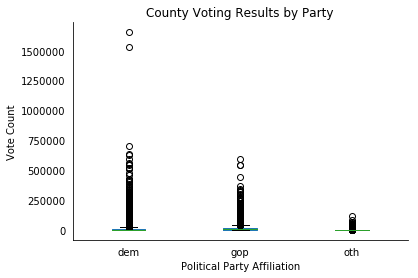

In [16]:
fig = plt.figure()
ax = df_results_2016.loc[:,'dem':].boxplot()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

ax.set_title('County Voting Results by Party')
ax.set_xlabel('Political Party Affiliation')
ax.set_ylabel('Vote Count')

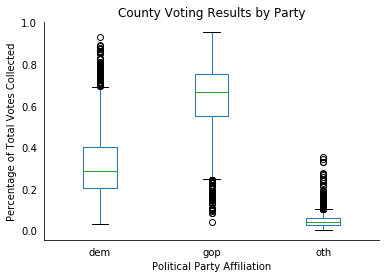

In [17]:
with PdfPages('county_results_by_party.pdf') as pdf:
    
    fig = plt.figure()
    ax = df_results_2016.loc[:,'dem':'oth'].div(df_results_2016['total'], axis=0).plot.box()

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(False)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')

    ax.set_title('County Voting Results by Party')
    ax.set_xlabel('Political Party Affiliation')
    ax.set_ylabel('Percentage of Total Votes Collected')
    
    # Save the figure to the file
    pdf.savefig()

Note: There are some data points that are above one in the non-2016 election results. These points shouldn't exist.

Question: Do democrats tend to win larger counties and republicans win the smaller (population-wise) counties, but more of them? 

Question: Do democrats tend to win more densely populated counties?

In [18]:
df_results_2016['demo_win'] = df_results_2016['dem'] > df_results_2016['gop']

/Users/scott/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
df_results_2016.head(10)

,fips_code,county,Year,total,dem,gop,oth,demo_win
2,1001,Autauga County,2016,24661,5908,18110,643,False
5,1003,Baldwin County,2016,94090,18409,72780,2901,False
8,1005,Barbour County,2016,10390,4848,5431,111,False
11,1007,Bibb County,2016,8748,1874,6733,141,False
14,1009,Blount County,2016,25384,2150,22808,426,False
17,1011,Bullock County,2016,4701,3530,1139,32,True
20,1013,Butler County,2016,8685,3716,4891,78,False
23,1015,Calhoun County,2016,47376,13197,32803,1376,False
26,1017,Chambers County,2016,13778,5763,7803,212,False
29,1019,Cherokee County,2016,10503,1524,8809,170,False


In [20]:
county_win_count = df_results_2016.groupby('demo_win').size()
county_win_count

demo_win
False    2625
True      487
dtype: int64

In [21]:
county_win_median = df_results_2016.groupby('demo_win')['total'].median()
county_win_median

demo_win
False     9684
True     42523
Name: total, dtype: int64

In [22]:
county_win_total = df_results_2016.groupby('demo_win')['total'].sum()
county_win_total

demo_win
False    61286285
True     65983042
Name: total, dtype: int64

Question: What are the fields in this df_results dataframe? Do the counts refer to votes collected? Confirm this information.

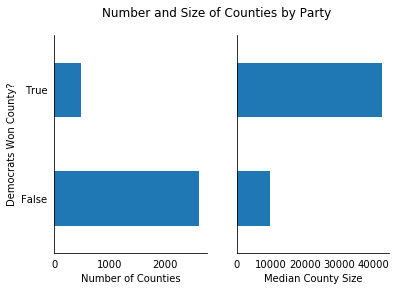

In [23]:
with PdfPages('size_num_counties_by_party.pdf') as pdf:
    
    f, ax = plt.subplots(1,2, sharey=True)

    f.suptitle('Number and Size of Counties by Party')

    county_win_count.plot(kind='barh',ax=ax[0])
    county_win_median.plot(kind='barh',ax=ax[1])

    ax[0].spines['right'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[0].yaxis.set_ticks_position('none')
    ax[0].xaxis.set_ticks_position('none')
    ax[0].set_xlabel('Number of Counties')
    ax[0].set_ylabel('Democrats Won County?')

    ax[1].spines['right'].set_visible(False)
    ax[1].spines['top'].set_visible(False)
    ax[1].yaxis.set_ticks_position('none')
    ax[1].xaxis.set_ticks_position('none')
    ax[1].set_xlabel('Median County Size')
    ax[1].set_ylabel('Democrats Won County?')
    
    # Save the figure to the file
    pdf.savefig()

#### Looking at Foreign Born Population

In [24]:
foreign_born = df_acs['Id.1'] == 601
df_acs_foreign_born = df_acs[foreign_born]
df_acs_foreign_born = df_acs_foreign_born.loc[:,:'Estimate; TOTAL NUMBER OF RACES REPORTED - Total population']
df_acs_foreign_born = df_acs_foreign_born.rename(columns={'Estimate; TOTAL NUMBER OF RACES REPORTED - Total population':'Foreign Born Population'})
df_acs_foreign_born = df_acs_foreign_born.drop(['Population Group', 'Id','Id.1'], axis=1)
df_acs_foreign_born.head()

,Id2,Geography,Foreign Born Population
40,4013,"Maricopa County, Arizona",612293
51,4019,"Pima County, Arizona",133490
84,6001,"Alameda County, California",526148
106,6013,"Contra Costa County, California",289652
121,6019,"Fresno County, California",209492


In [25]:
total_pop = df_acs['Id.1'] == 1
df_acs_total = df_acs[total_pop]
df_acs_total = df_acs_total.loc[:,:'Estimate; TOTAL NUMBER OF RACES REPORTED - Total population']
df_acs_total = df_acs_total.rename(columns={'Estimate; TOTAL NUMBER OF RACES REPORTED - Total population':'Total Population'})
df_acs_total = df_acs_total.drop(['Population Group', 'Id','Id.1'], axis=1)
df_acs_total.head()

,Id2,Geography,Total Population
0,1073,"Jefferson County, Alabama",660367
10,4013,"Maricopa County, Arizona",4167947
41,4019,"Pima County, Arizona",1010025
52,6001,"Alameda County, California",1638215
85,6013,"Contra Costa County, California",1126745


In [26]:
foreign_born_data = df_acs_foreign_born.merge(df_acs_total.drop('Geography', axis=1), how='inner', on='Id2')
foreign_born_data['Foreign Born Population %'] = foreign_born_data['Foreign Born Population']/foreign_born_data['Total Population']
foreign_born_data = foreign_born_data.merge(df_demo, how='inner', left_on='Id2', right_on='FIPS')
foreign_born_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 105
Data columns (total 43 columns):
Id2                                  106 non-null int64
Geography                            106 non-null object
Foreign Born Population              106 non-null int64
Total Population                     106 non-null int64
Foreign Born Population %            106 non-null float64
State                                106 non-null object
FIPS                                 106 non-null int64
County                               106 non-null object
election_result                      106 non-null object
% Some College                       106 non-null float64
% Smokers                            106 non-null int64
% Single-Parent Households           106 non-null int64
% Severe Housing Problems            106 non-null int64
% Receiving HbA1c                    106 non-null float64
% Physically Inactive                106 non-null int64
% Obese                              106 non-

#### REMEMBER: CONSIDER WHEN YOU ARE COMPARING POPULATION DISTRIBUTIONS, SAMPLE DISTRIBUTIONS, OR SAMPLING DISTRIBUTIONS. STATISTICS DOESN'T/CAN'T SAY ANYTHING ABOUT ANY TYPE OF DISTRIBUTION BESIDES SAMPLING DISTRIBUTIONS, THE OTHER TYPES OF DISTRIBUTIONS DO NOT HAVE PREDICTABLE/KNOWABLE PROPERTIES.

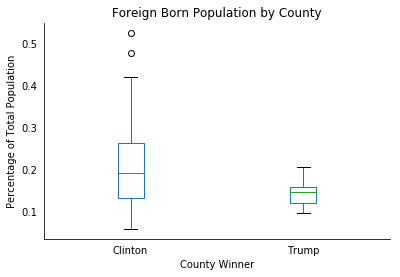

In [27]:
with PdfPages('foreign_born_by_results.pdf') as pdf:
    
    f = plt.figure()
    
    ax = foreign_born_data.boxplot(column='Foreign Born Population %', by='election_result')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    ax.grid(False)
    ax.set_xlabel('County Winner')
    ax.set_ylabel('Percentage of Total Population')
    ax.set_title('Foreign Born Population by County')
    
    plt.suptitle('')
    pdf.savefig()

In [28]:
foreign_born_data.groupby('election_result')['Foreign Born Population %'].describe()

,count,mean,std,min,25%,50%,75%,max
election_result,,,,,,,,
Clinton,92.0,0.208770,0.095418,0.059543,0.132525,0.192787,0.264732,0.526673
Trump,14.0,0.148776,0.035620,0.097662,0.121229,0.146534,0.159637,0.205952


In [29]:
foreign_born_data['Foreign Born Population %'].describe()

count    106.000000
mean       0.200846
std        0.092001
min        0.059543
25%        0.131293
50%        0.181622
75%        0.254236
max        0.526673
Name: Foreign Born Population %, dtype: float64

In [30]:
mean_sample = foreign_born_data.groupby('election_result')['Foreign Born Population %'].median().diff()[1]
mean_sample

-0.046253340563660206

#### are distributions of foreign percentages different between Trump and Clinton counties?

In [31]:
clinton_num_obs = foreign_born_data.groupby('election_result')['Foreign Born Population %'].describe().loc['Clinton','count']
clinton_num_obs = int(clinton_num_obs)
trump_num_obs = foreign_born_data.groupby('election_result')['Foreign Born Population %'].describe().loc['Trump','count']
trump_num_obs = int(trump_num_obs)

##### NB: MAJOR QUESTION HERE IS IF THE TWO SAMPLES ARE REPRESENTATIVE OF POPULATION. HOW DID CENSUS CHOOSE THESE SPECIFIC COUNTIES TO ESTIMATE? RANDOM OR SOME OTHER CRITERION?

##### use MEAN or MEDIAN for hypothesis test?

##### without replacement

In [32]:
all_data = foreign_born_data['Foreign Born Population %']
len_sample = clinton_num_obs + trump_num_obs
num_resamples = 10000

means_resample = []
    
for _ in range(num_resamples):
    resample = np.random.choice(all_data, size=len_sample, replace=False)
    resample_clinton, resample_trump = np.split(resample, [clinton_num_obs])
    means_resample.append(np.median(resample_clinton) - np.median(resample_trump))

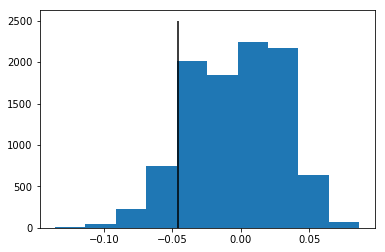

In [33]:
f, ax = plt.subplots(1,1) 

plt.hist(means_resample)
ax.vlines(mean_sample,0,2500)

In [34]:
p_value = (np.sum(np.abs(means_resample) > np.abs(mean_sample))+1)/(np.size(means_resample)+1)
p_value

0.15998400159984003

##### with replacement

In [35]:
all_data = foreign_born_data['Foreign Born Population %']
len_sample = clinton_num_obs + trump_num_obs
num_resamples = 10000

means_resample = []
    
for _ in range(num_resamples):
    resample = np.random.choice(all_data, size=len_sample, replace=True)
    resample_clinton, resample_trump = np.split(resample, [clinton_num_obs])
    means_resample.append(np.median(resample_clinton) - np.median(resample_trump))

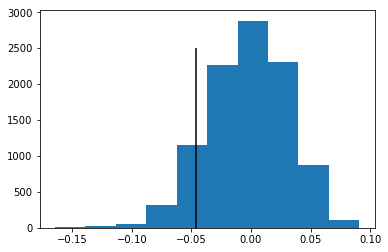

In [36]:
f, ax = plt.subplots(1,1) 

plt.hist(means_resample)
ax.vlines(mean_sample,0,2500)

In [37]:
p_value = (np.sum(np.abs(means_resample) > np.abs(mean_sample))+1)/(np.size(means_resample)+1)
p_value

0.1621837816218378

mean gives significant results, but median doesnt. prob since clinton distro is skewed right. how to interpret hypothesis testing, signifinance testing. any use?

##### comparing standard deviations between samples

In [38]:
std_sample = foreign_born_data.groupby('election_result')['Foreign Born Population %'].std().diff()[1]
std_sample

-0.059797837991213958

In [39]:
all_data = foreign_born_data['Foreign Born Population %']
len_sample = clinton_num_obs + trump_num_obs
num_resamples = 10000

std_resample = []
    
for _ in range(num_resamples):
    resample = np.random.choice(all_data, size=len_sample, replace=True)
    resample_clinton, resample_trump = np.split(resample, [clinton_num_obs])
    std_resample.append(np.std(resample_clinton) - np.std(resample_trump))

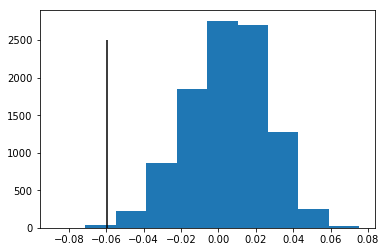

In [40]:
f, ax = plt.subplots(1,1) 

plt.hist(std_resample)
ax.vlines(std_sample,0,2500)

In [41]:
p_value = (np.sum(np.abs(std_resample) > np.abs(std_sample))+1)/(np.size(std_resample)+1)
p_value

0.0047995200479952005

In [42]:
def graph_variable(var_name):

    with PdfPages(var_name + '_by_results.pdf') as pdf:

        f = plt.figure()

        ax = foreign_born_data.boxplot(column=var_name, by='election_result')

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('none')
        ax.xaxis.set_ticks_position('none')
        ax.grid(False)
        ax.set_xlabel('County Winner')
        ax.set_ylabel(var_name)
        ax.set_title(var_name + ' by County')

        plt.suptitle('')
        pdf.savefig()

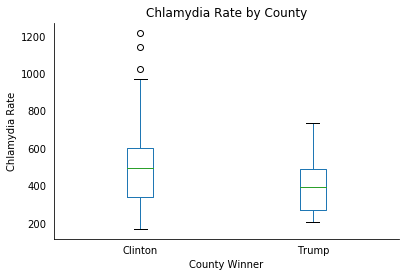

In [43]:
graph_variable('Chlamydia Rate')

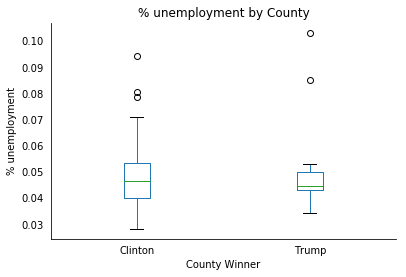

In [44]:
graph_variable('% unemployment')

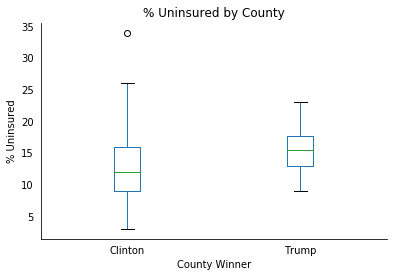

In [45]:
graph_variable('% Uninsured')

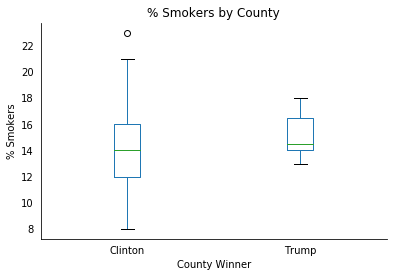

In [46]:
graph_variable('% Smokers')

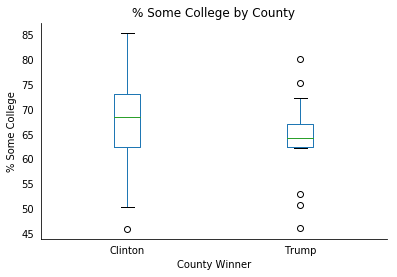

In [47]:
graph_variable('% Some College')

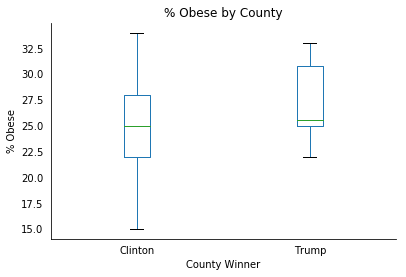

In [48]:
graph_variable('% Obese')

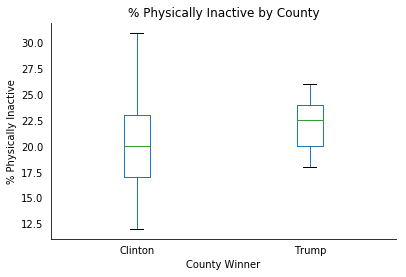

In [49]:
graph_variable('% Physically Inactive')

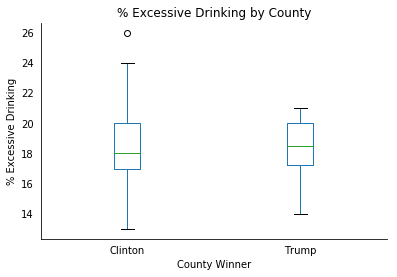

In [50]:
graph_variable('% Excessive Drinking')

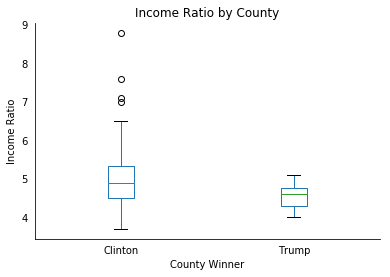

In [51]:
graph_variable('Income Ratio')

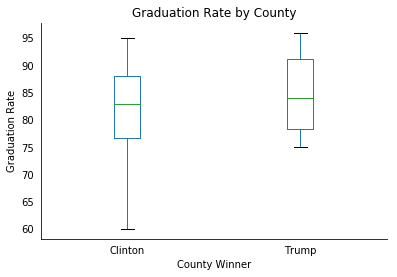

In [52]:
graph_variable('Graduation Rate')

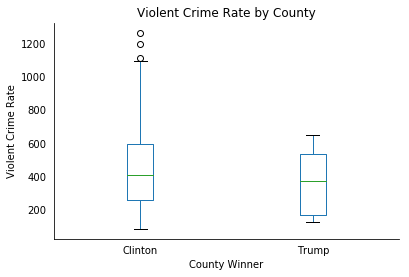

In [53]:
graph_variable('Violent Crime Rate')

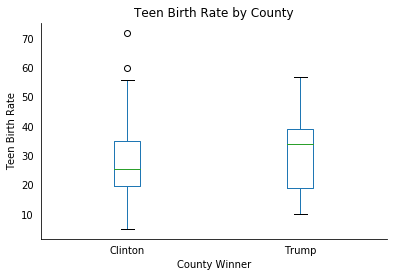

In [54]:
graph_variable('Teen Birth Rate')

#### joining voting percentage results to demo file

In [55]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 38 columns):
State                                3111 non-null object
FIPS                                 3111 non-null int64
County                               3111 non-null object
election_result                      3111 non-null object
% Some College                       3111 non-null float64
% Smokers                            3111 non-null int64
% Single-Parent Households           3111 non-null int64
% Severe Housing Problems            3111 non-null int64
% Receiving HbA1c                    3078 non-null float64
% Physically Inactive                3111 non-null int64
% Obese                              3111 non-null int64
% Long Commute - Drives Alone        3111 non-null int64
% LBW                                3022 non-null float64
% Fair/Poor                          3111 non-null int64
% Excessive Drinking                 3111 non-null int64
% Drive Alone - White        

In [56]:
df_results_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112 entries, 2 to 9335
Data columns (total 8 columns):
fips_code    3112 non-null int64
county       3112 non-null object
Year         3112 non-null int64
total        3112 non-null int64
dem          3112 non-null int64
gop          3112 non-null int64
oth          3112 non-null int64
demo_win     3112 non-null bool
dtypes: bool(1), int64(6), object(1)
memory usage: 197.5+ KB


In [57]:
df_results_2016.head()

,fips_code,county,Year,total,dem,gop,oth,demo_win
2,1001,Autauga County,2016,24661,5908,18110,643,False
5,1003,Baldwin County,2016,94090,18409,72780,2901,False
8,1005,Barbour County,2016,10390,4848,5431,111,False
11,1007,Bibb County,2016,8748,1874,6733,141,False
14,1009,Blount County,2016,25384,2150,22808,426,False


In [65]:
df_results_2016.loc[:,'dem_per'] = df_results_2016.loc[:,'dem']/df_results_2016.loc[:,'total']
df_results_2016.loc[:,'gop_per'] = df_results_2016.loc[:,'gop']/df_results_2016.loc[:,'total']
df_results_2016.loc[:,'oth_per'] = df_results_2016.loc[:,'oth']/df_results_2016.loc[:,'total']

In [66]:
df_results_2016.head()

,fips_code,county,Year,total,dem,gop,oth,demo_win,dem_per,gop_per,oth_per
2,1001,Autauga County,2016,24661,5908,18110,643,False,0.239569,0.734358,0.026074
5,1003,Baldwin County,2016,94090,18409,72780,2901,False,0.195653,0.773515,0.030832
8,1005,Barbour County,2016,10390,4848,5431,111,False,0.466603,0.522714,0.010683
11,1007,Bibb County,2016,8748,1874,6733,141,False,0.214220,0.769662,0.016118
14,1009,Blount County,2016,25384,2150,22808,426,False,0.084699,0.898519,0.016782


In [67]:
df_results_per = df_results_2016.loc[:,['fips_code','dem_per','gop_per','oth_per','total']].merge(df_demo, how='inner', left_on='fips_code', right_on='FIPS')

In [69]:
df_results_per.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111 entries, 0 to 3110
Data columns (total 43 columns):
fips_code                            3111 non-null int64
dem_per                              3111 non-null float64
gop_per                              3111 non-null float64
oth_per                              3111 non-null float64
total                                3111 non-null int64
State                                3111 non-null object
FIPS                                 3111 non-null int64
County                               3111 non-null object
election_result                      3111 non-null object
% Some College                       3111 non-null float64
% Smokers                            3111 non-null int64
% Single-Parent Households           3111 non-null int64
% Severe Housing Problems            3111 non-null int64
% Receiving HbA1c                    3078 non-null float64
% Physically Inactive                3111 non-null int64
% Obese                  

In [80]:
cols_to_keep = ['FIPS'
                ,'dem_per'
                ,'gop_per'
                ,'oth_per'
                ,'total'
               # ,'election_result'
                ,'% Some College'
                ,'% Physically Inactive'
                ,'% Obese'
                ,'% Excessive Drinking'
                ,'Graduation Rate'
                ,'Income Ratio']
df_data_filtered = df_results_per[cols_to_keep]

In [81]:
df_data_filtered.corr()

,FIPS,dem_per,gop_per,oth_per,total,% Some College,% Physically Inactive,% Obese,% Excessive Drinking,Graduation Rate,Income Ratio
FIPS,1.000000,-0.057407,0.050397,0.033398,-0.053802,0.013236,-0.062647,-0.048678,0.063905,0.128911,-0.085952
dem_per,-0.057407,1.000000,-0.983902,0.011371,0.397880,0.186621,-0.311880,-0.135091,0.124917,-0.309622,0.323064
gop_per,0.050397,-0.983902,1.000000,-0.189884,-0.395627,-0.253621,0.397025,0.195979,-0.167243,0.320047,-0.268389
oth_per,0.033398,0.011371,-0.189884,1.000000,0.027758,0.393821,-0.508057,-0.354398,0.249502,-0.094757,-0.273010
total,-0.053802,0.397880,-0.395627,0.027758,1.000000,0.255476,-0.267332,-0.261200,0.170981,-0.124422,0.090873
% Some College,0.013236,0.186621,-0.253621,0.393821,0.255476,1.000000,-0.536154,-0.411272,0.506442,0.013566,-0.207442
% Physically Inactive,-0.062647,-0.311880,0.397025,-0.508057,-0.267332,-0.536154,1.000000,0.711194,-0.582826,0.055275,0.212307
% Obese,-0.048678,-0.135091,0.195979,-0.354398,-0.261200,-0.411272,0.711194,1.000000,-0.386939,-0.030150,0.142879
% Excessive Drinking,0.063905,0.124917,-0.167243,0.249502,0.170981,0.506442,-0.582826,-0.386939,1.000000,0.019540,-0.292820
Graduation Rate,0.128911,-0.309622,0.320047,-0.094757,-0.124422,0.013566,0.055275,-0.030150,0.019540,1.000000,-0.186330
